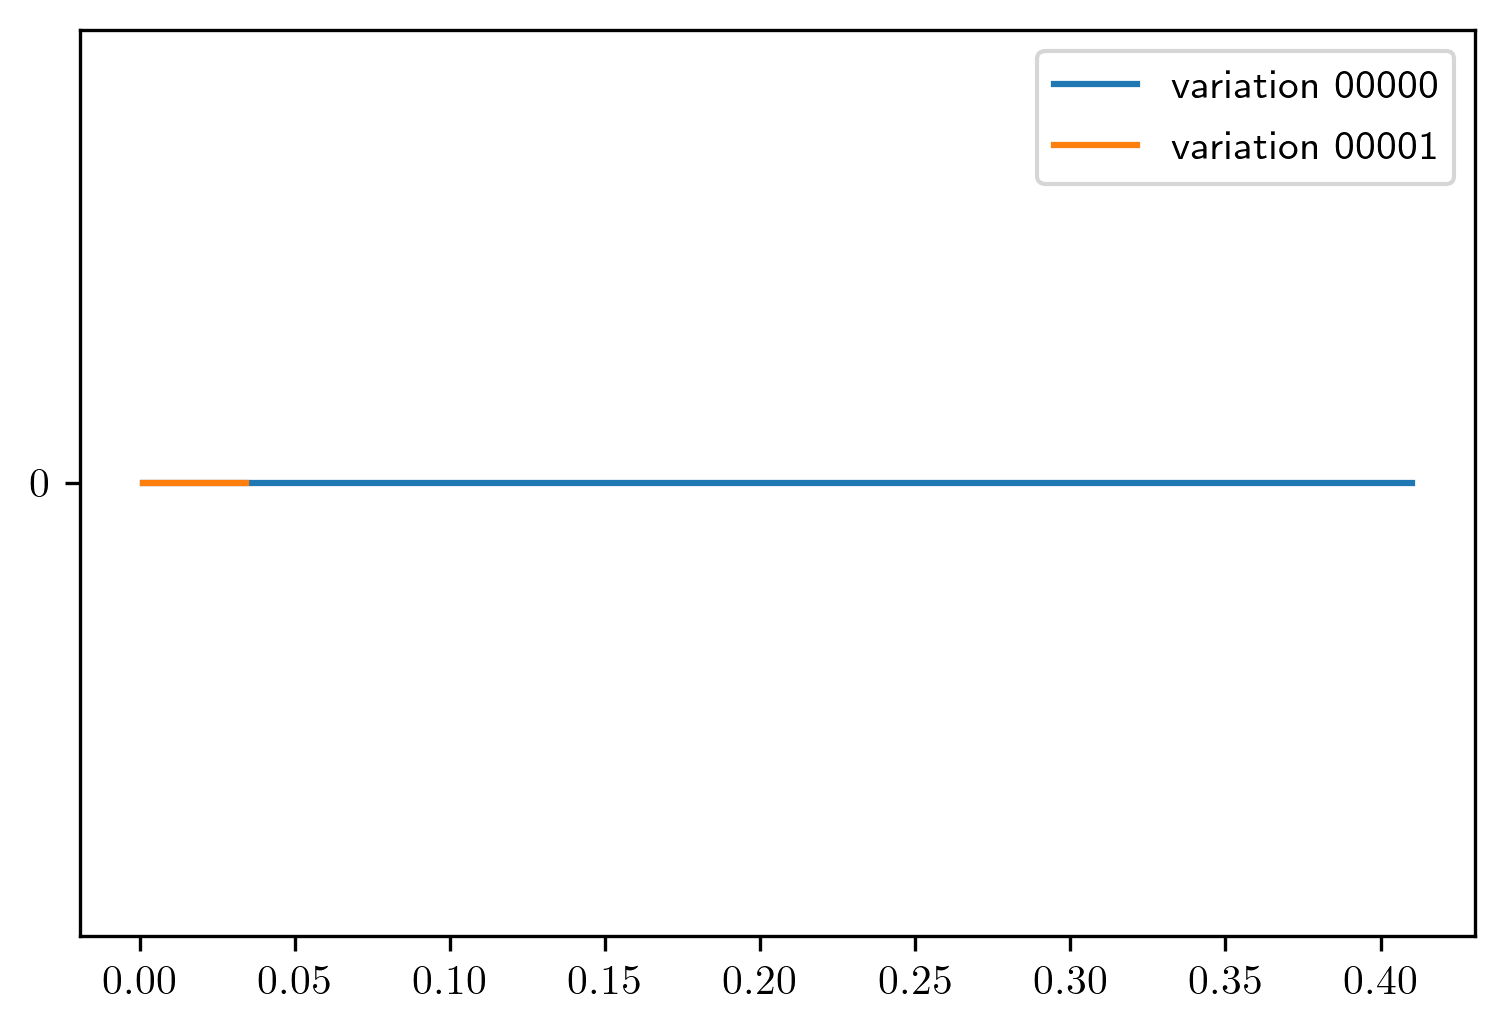

In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['text.usetex'] = True
rcParams['figure.dpi'] = 300

studyName = "densityRatioInfluence.parameter_00"

studyDirs = [directory for directory in os.listdir(os.curdir) \
             if os.path.isdir(directory) and studyName in directory] 

studyDirs.sort()

studyFileName = "stationaryDropletResults.csv"
studyFilePaths = [os.path.join(studyDir, studyFileName) for studyDir in studyDirs \
                  if os.path.exists(os.path.join(studyDir,studyFileName))]

studyDframes = [pd.read_csv(studyFilePath) for studyFilePath in studyFilePaths]


fig, ax = plt.subplots()
ax.set_yscale('symlog')

for i, studyDframe in enumerate(studyDframes):
    ax.plot(studyDframe['time'], studyDframe['capillary number (droplet)'], label="variation %05d" %i)
    
plt.legend()
plt.show()